In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt

In [78]:
df=pd.read_csv("dataprocessed.csv")

In [79]:
len(df.variety.unique())

691

In [80]:
print('The shape of our features is:', df.shape)

The shape of our features is: (120915, 10)


In [81]:
df.describe()

,price,points
count,120915.000000,120915.000000
mean,35.368796,88.421726
std,41.031188,3.044954
min,4.000000,80.000000
25%,17.000000,86.000000
50%,25.000000,88.000000
75%,42.000000,91.000000
max,3300.000000,100.000000


In [95]:
df.head(10)

,variety,designation,country,province,winery,taster_name,points
0,portuguese red,avidagos,portugal,douro,quinta dos avidagos,roger voss,87
1,pinot gris,oregon,us,oregon,rainstorm,paul gregutt,87
2,riesling,reserve late harvest,us,michigan,st. julian,alexander peartree,87
3,pinot noir,vintner's reserve wild child block,us,oregon,sweet cheeks,paul gregutt,87
4,tempranillo-merlot,ars in vitro,spain,northern spain,tandem,michael schachner,87
5,frappato,belsito,italy,sicily & sardinia,terre di giurfo,kerin o’keefe,87
6,gewürztraminer,alsace,france,alsace,trimbach,roger voss,87
7,gewürztraminer,shine,germany,rheinhessen,heinz eifel,anna lee c. iijima,87
8,pinot gris,les natures,france,alsace,jean-baptiste adam,roger voss,87
9,cabernet sauvignon,mountain cuvée,us,california,kirkland signature,virginie boone,87


In [83]:
# del df[['taster_name','description','title']]
df.taster_name.fillna(-1)
del df['description']
del df['title']
# df=pd.get_dummies(df)

In [84]:
labels=np.array(df['price'])

In [85]:
df=df.drop('price',axis=1)

In [34]:
# df=df.values

In [ ]:
# train_features, test_features, train_labels, test_labels = train_test_split(df, labels, test_size = 0.25, random_state = 42)
# print('Training Features Shape:', train_features.shape)
# print('Training Labels Shape:', train_labels.shape)
# print('Testing Features Shape:', test_features.shape)
# print('Testing Labels Shape:', test_labels.shape)

In [ ]:
# # Instantiate model with 1000 decision trees
# rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# # Train the model on training data
# rf.fit(train_features, train_labels);

In [ ]:
# predictions = rf.predict(test_features)
# # Calculate the absolute errors
# errors = abs(predictions - test_labels)
# # Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [86]:
df

,variety,designation,country,province,winery,taster_name,points
0,portuguese red,avidagos,portugal,douro,quinta dos avidagos,roger voss,87
1,pinot gris,oregon,us,oregon,rainstorm,paul gregutt,87
2,riesling,reserve late harvest,us,michigan,st. julian,alexander peartree,87
3,pinot noir,vintner's reserve wild child block,us,oregon,sweet cheeks,paul gregutt,87
4,tempranillo-merlot,ars in vitro,spain,northern spain,tandem,michael schachner,87
...,...,...,...,...,...,...,...
120910,riesling,brauneberger juffer-sonnenuhr spätlese,germany,mosel,dr. h. thanisch (erben müller-burggraef),anna lee c. iijima,90
120911,pinot noir,oregon,us,oregon,citation,paul gregutt,90
120912,gewürztraminer,kritt,france,alsace,domaine gresser,roger voss,90
120913,pinot gris,alsace,france,alsace,domaine marcel deiss,roger voss,90


In [87]:
from sklearn.model_selection import train_test_split
from catboost import Pool, CatBoostRegressor, cv

X=df

X=X.fillna(-1)
print(X.columns)
categorical_features_indices =[0,1,2,3,4,5,6]
y=labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, 
                                                    random_state=52)

Index(['variety', 'designation', 'country', 'province', 'winery',
       'taster_name', 'points'],
      dtype='object')


In [88]:
categorical_features_indices

[0, 1, 2, 3, 4, 5, 6]

In [93]:
def perform_model(X_train, y_train,X_valid, y_valid,X_test, y_test):
    model = CatBoostRegressor(
        random_seed = 400,
        loss_function = 'RMSE',
        iterations=100,
    )
    
    model.fit(
        X_train, y_train,
        cat_features = categorical_features_indices,
        eval_set=(X_valid, y_valid),
        verbose=False
    )
    
    print("RMSE on training data: "+ model.score(X_train, y_train).astype(str))
    print("RMSE on test data: "+ model.score(X_test, y_test).astype(str))
    
    return model

In [94]:
model=perform_model(X_train, y_train,X_valid, y_valid,X_test, y_test)

RMSE on training data: 0.5591728787094588
RMSE on test data: 0.3514526190642865


[15.93165419 16.77449444 57.80786011 ... 12.3574002  20.25433892
 51.32089565]
[15. 23. 48. ... 14. 22. 50.]


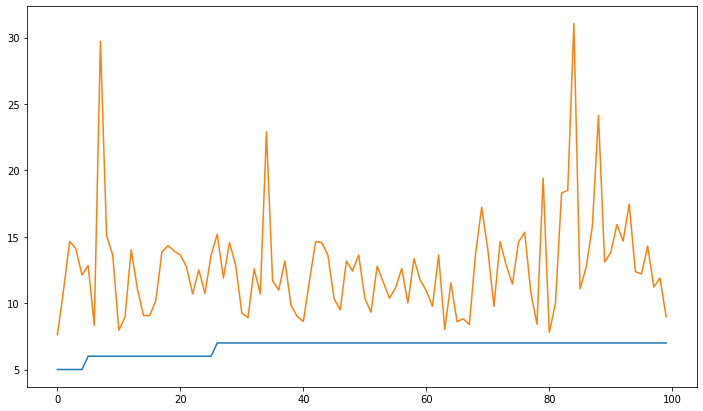

In [128]:
y_test_pred=model.predict(X_test)
print(y_test_pred)
print(y_test)
sorted_ind=np.argsort(y_test)
plt.plot(y_test[sorted_ind][:100])
plt.plot(y_test_pred[sorted_ind][:100])

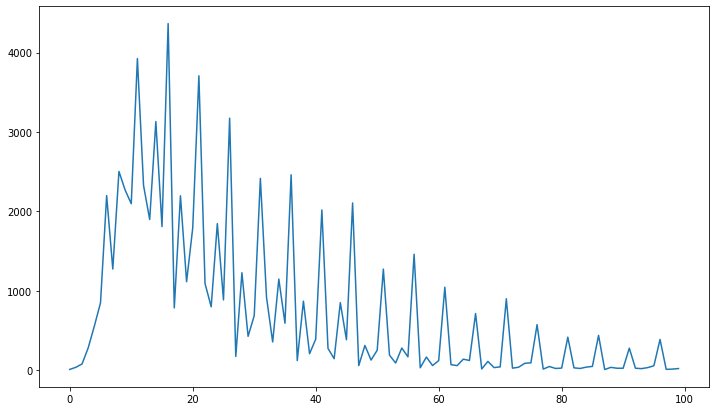

In [119]:
a=np.histogram(y_train, bins=int(np.max(y_train)))
plt.plot(a[0][:100])

In [91]:
feature_score = pd.DataFrame(list(zip(X.dtypes.index, model.get_feature_importance(Pool(X, label=y, cat_features=categorical_features_indices)))),
                columns=['Feature','Score'])

feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

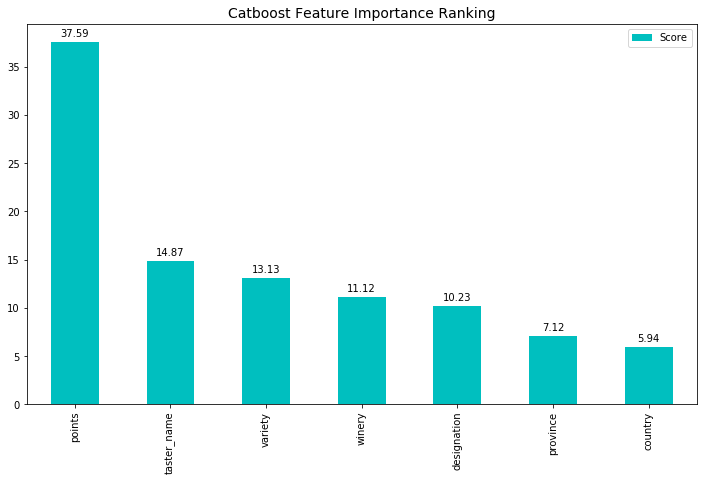

In [92]:
plt.rcParams["figure.figsize"] = (12,7)
ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()